# Calculates correlations between pairs
Here we calculate the correlations between pairs of stocks on their log returns. Log return is defined as:
\begin{equation}
    r_t = \log\left(\frac{P_t}{P_{t-1}}\right)
\end{equation}
The goal is to get the 10 most highly correlated pairs to include in our portfolio. We calculate only on years 2022 and 2023, as 2024 is our testing data. 

We save the a csv file including the outputted correlations to be used in the backtesting model. **Running this file is not reccomended**

In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

folder_path = "2022-2024 1min data"

csv_files = glob(os.path.join(folder_path, "*.csv"))

stock_data = {}

for file in csv_files:
    stock_symbol = os.path.basename(file).split("_")[0]

    df = pd.read_csv(file, index_col="timestamp", usecols=["timestamp", "close"], parse_dates=True)
    df.dropna(inplace=True) 

    # drop 2024 data
    df = df[df.index.year < 2024]
    if len(df) > 100000:
        df.columns = [stock_symbol]
        stock_data[stock_symbol] = df
    

# Combine into one DataFrame with aligned timestamps
print("Loaded data")
combined_df = pd.concat(stock_data.values(), axis=1)
print("Concatenated")
combined_df = combined_df.sort_index().dropna()
print("Sorted")

# Calculate log returns
returns_df = np.log(combined_df / combined_df.shift(1)).dropna()
# Compute Pearson correlation matrix
correlation_matrix = returns_df.corr()

In [ ]:
# Extract top correlated pairs (excluding self-correlations)

correlations = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
pairs = correlations.unstack().dropna().sort_values(ascending=False).drop_duplicates()
pairs.to_csv("correlations/correlation_data.csv", index=True)

GOOGL  GOOG     0.997960
FOXA   FOX      0.988429
PAGP   PAA      0.973286
CHTR   LBRDK    0.966248
AVB    EQR      0.955496
                  ...   
CNK    MDGL    -0.533560
LMT    BHVN    -0.575581
BAM    SMMT    -0.576245
PCVX   BHVN    -0.597387
GILD   BHVN    -0.597904
Length: 848253, dtype: float64

In [ ]:
pairs = pd.read_csv("correlations/correlation_data.csv")
pairs.to_csv("correlations/correlation_data_1")
pairs.columns= ['Stock A', 'Stock B', 'Correlation']

In [ ]:
# pairs[(abs(pairs["Correlation"]) > 0.9)]
pairs[:10]

,Stock A,Stock B,Correlation
0,GOOGL,GOOG,0.997960
1,FOXA,FOX,0.988429
2,PAGP,PAA,0.973286
3,CHTR,LBRDK,0.966248
4,AVB,EQR,0.955496
5,LEN,DHI,0.954048
6,AMAT,LRCX,0.940962
7,SLG,VNO,0.938770
8,BRX,KIM,0.938485
9,VMC,MLM,0.938436


In [ ]:
# Correlation on stock prices instead of log returns

correlation_matrix2 = combined_df.corr()
correlations2 = correlation_matrix2.where(~np.eye(correlation_matrix2.shape[0], dtype=bool))
pairs2 = correlations2.unstack().dropna().sort_values(ascending=False).drop_duplicates()

GOOGL  GOOG    0.999761
PAGP   PAA     0.997426
DHI    LEN     0.996365
PHM    TOL     0.993185
FOXA   FOX     0.991252
                 ...   
LUMN   ORLY   -0.941861
PCG    LUMN   -0.942553
AAP    VIST   -0.943898
ACGL   D      -0.947728
LUMN   ACGL   -0.960384
Length: 848253, dtype: float64

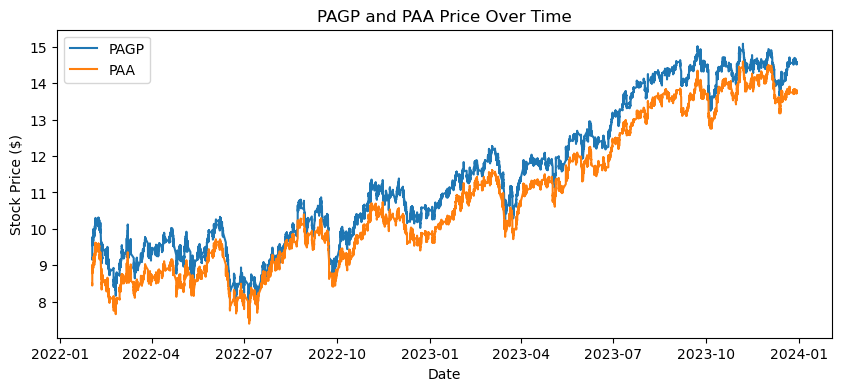

In [ ]:
stockA = "PAGP"
stockB = "PAA"
stockA_data = pd.read_csv(f"2022-2024 1min data/{stockA}_2022-2024_1min.csv", index_col="timestamp", usecols=["timestamp", "close"], parse_dates=True)
stockA_data = stockA_data[stockA_data.index.year < 2024]
stockB_data = pd.read_csv(f"2022-2024 1min data/{stockB}_2022-2024_1min.csv", index_col="timestamp", usecols=["timestamp", "close"], parse_dates=True)
stockB_data = stockB_data[stockB_data.index.year < 2024]
stockA_data


plt.figure(figsize=(10,4))
plt.plot(stockA_data, label=stockA)
plt.plot(stockB_data, label=stockB)
plt.ylabel("Stock Price ($)")
plt.xlabel("Date")
plt.title(f"{stockA} and {stockB} Price Over Time")
plt.legend()
plt.savefig(f"report figures/{stockA} and {stockB} Price Over Time.png")